In [1]:
# Imports
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read our json file
f = open('logins.json')
logins_dict = json.load(f)
f.close()

# Convert to dataframe
logins_df = pd.DataFrame(logins_dict)
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Check data type
logins_df.dtypes

login_time    object
dtype: object

In [4]:
# Convert string to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])
print(logins_df.dtypes)
logins_df.head()

login_time    datetime64[ns]
dtype: object


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Count by 15 minute interval
logins_df['count'] = 1
logins_df.set_index('login_time', inplace=True)
logins_df = logins_df.resample("15Min").sum()
logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


<ipython-input-6-e0e276ec114c>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


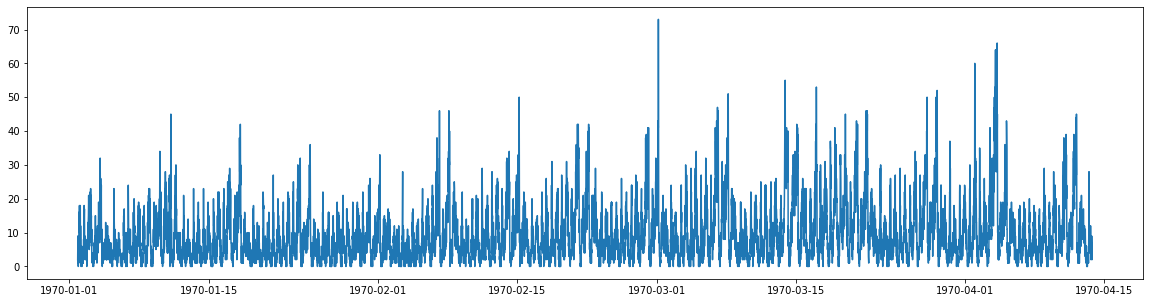

In [6]:
# Plot
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(logins_df)
fig.show()

<ipython-input-7-79a8ee069156>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


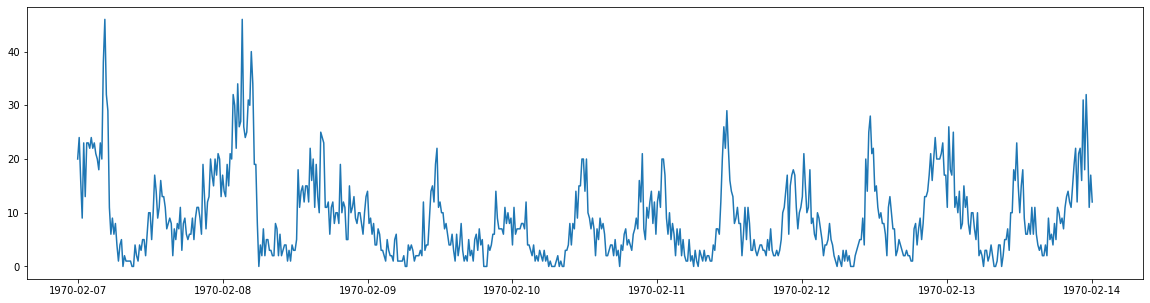

In [7]:
# Plot a shorter period of time
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(logins_df.truncate(before="1970-2-7", after="1970-2-14")) # This range is Sunday through Saturday
fig.show()

# Every day, we see high usage around noon and midnight with low usage around 6 am and 6 pm.
# We also see higher than normal peaks on Saturday and Sunday nights/Sunday and Monday mornings